61
60
[4.96028697e+03 2.01711209e+00 1.98477033e+03 2.99821583e+00
 3.03334218e-01]


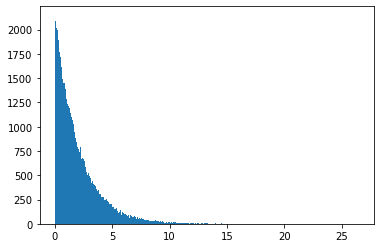

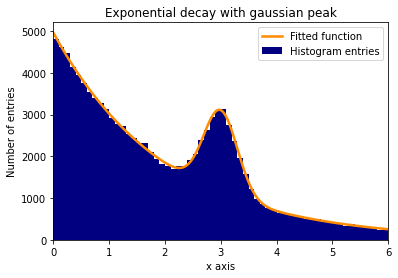

<Figure size 432x288 with 0 Axes>

In [12]:
# 1.) Necessary imports.    
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Generate exponential and gaussian data and histograms.
data = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)
bins = np.linspace(0, 6, 61)
print(len(bins))
data_entries_1, bins_1 = np.histogram(data, bins=bins)

fig, ax = plt.subplots()
plt.hist(data,600)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
data_entries = data_entries_1 + data_entries_2
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
print(len(binscenters))

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])
print(popt)

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
fig1,ax1 = plt.subplots()
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()